In [1]:
!wget https://www.dropbox.com/s/va90dnmndh0x8el/28577_36429_bundle_archive.zip

--2021-01-15 12:27:27--  https://www.dropbox.com/s/va90dnmndh0x8el/28577_36429_bundle_archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va90dnmndh0x8el/28577_36429_bundle_archive.zip [following]
--2021-01-15 12:27:27--  https://www.dropbox.com/s/raw/va90dnmndh0x8el/28577_36429_bundle_archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39eda3f7b6e67a6acc453d7e5c.dl.dropboxusercontent.com/cd/0/inline/BHDGnBASc0XgtaW28YhN3yt7mXpNZIhiXN7BsGFOAqW8IL8v9ii9Fj3wB64nIvHQNEd5pvuffD_AI60XAYjfCzgIQ-99tyjmWjDdz4TwJwxOwfTXhrGq25uvnC4xD8iefrM/file# [following]
--2021-01-15 12:27:28--  https://uc39eda3f7b6e67a6acc453d7e5c.dl.dropboxusercontent.com/cd/0/inline/BHDGnBASc0XgtaW28YhN3yt7mXpNZIhiXN7BsGFOAqW8IL8v9ii9Fj

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2

In [4]:
!unzip 28577_36429_bundle_archive.zip

Archive:  28577_36429_bundle_archive.zip
  inflating: fer2013.csv             


In [5]:
X_train, train_y, X_test, test_y= [],[],[],[]

In [6]:
df = pd.read_csv('/content/fer2013.csv')

In [7]:
for index, row in df.iterrows():
    val = row['pixels'].split(" ")
    try:
      if 'Training' in row['Usage']:
        X_train.append(np.array(val,'float32'))
        train_y.append(row['emotion'])
      elif 'PublicTest' in row['Usage']:
        X_test.append(np.array(val,'float32'))
        test_y.append(row['emotion'])
    except:
      print(f"error occured at index:{index} and row {row}")

In [8]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width, height = 48,48

In [10]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
train_y = to_categorical(train_y, num_classes=num_labels)
test_y = to_categorical(test_y, num_classes=num_labels)

In [16]:
#normalizing data between 0 and 1
X_train -= np.mean(X_train, axis = 0)
X_train /= np.std(X_train, axis = 0)

X_test -= np.mean(X_test, axis = 0)
X_test /= np.std(X_test, axis = 0)

print(f"shape: {X_train.shape}")
X_train = X_train.reshape(X_train.shape[0],48,48,1)

X_test = X_test.reshape(X_test.shape[0],48,48,1)



shape: (28709, 48, 48, 1)


In [17]:
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPool2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras


In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(X_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation = 'softmax'))



In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)         

In [21]:
#compiling the model
model.compile(loss=categorical_crossentropy,
              optimizer = 'sgd',
              metrics = ['accuracy'])


In [23]:
#Training the model
model.fit(X_train, train_y,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_test, test_y),
          shuffle = True)

Epoch 1/50
449/449 [==============================] - 12s 12ms/step - loss: 1.8549 - accuracy: 0.2422 - val_loss: 1.8200 - val_accuracy: 0.2494
Epoch 2/50
449/449 [==============================] - 5s 12ms/step - loss: 1.8008 - accuracy: 0.2529 - val_loss: 1.8007 - val_accuracy: 0.2499
Epoch 3/50
449/449 [==============================] - 5s 11ms/step - loss: 1.7877 - accuracy: 0.2583 - val_loss: 1.7858 - val_accuracy: 0.2527
Epoch 4/50
449/449 [==============================] - 5s 12ms/step - loss: 1.7729 - accuracy: 0.2569 - val_loss: 1.7809 - val_accuracy: 0.2497
Epoch 5/50
449/449 [==============================] - 5s 12ms/step - loss: 1.7718 - accuracy: 0.2618 - val_loss: 1.7718 - val_accuracy: 0.2725
Epoch 6/50
449/449 [==============================] - 5s 12ms/step - loss: 1.7492 - accuracy: 0.2839 - val_loss: 1.7480 - val_accuracy: 0.2937
Epoch 7/50
449/449 [==============================] - 5s 12ms/step - loss: 1.7270 - accuracy: 0.2999 - val_loss: 1.7120 - val_accuracy: 0.303

In [24]:
#saving the model to use it later on
fer_json = model.to_json()
with open("fer.json","w") as json_file:
  json_file.write(fer_json)
model.save_weights("fer.h5")

In [25]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [37]:
model = model_from_json(open("fer.json","r").read())
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

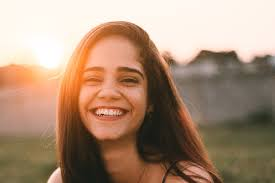

In [49]:
from google.colab.patches import cv2_imshow
import cv2
test_image = cv2.imread('/content/happy.jpeg')
cv2_imshow(test_image)

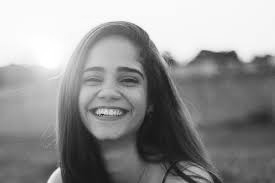

In [50]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [41]:
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-jm2xf06n
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-jm2xf06n
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489619 sha256=c1653da41e4c29494435cf7beb75d42f209422aff3d8d7750ed726264ac10737
  Stored in directory: /tmp/pip-ephem-wheel-cache-wu_e6gay/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


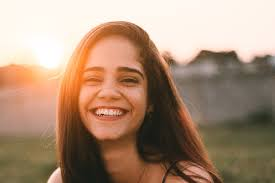

In [51]:
#face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
from pnslib import utils

face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
from keras.preprocessing.image import img_to_array
cv2_imshow(test_image)

happy


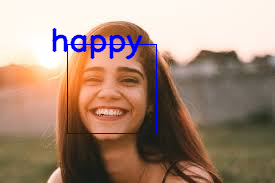

In [52]:
faces = face_cascade.detectMultiScale(gray_image,1.1,4)
#Draw rectangle arround face
for (x,y,w,h) in faces:
  cv2.rectangle(test_image, (x,y),(x+w,y+w),(255,0,0))
  roi_gray = gray_image[y:y+w, x:x+w]
  roi_gray = cv2.resize(roi_gray,(48,48))
  image_pixels = img_to_array(roi_gray)
  image_pixels = np.expand_dims(image_pixels, axis = 0)
  image_pixels /= 255
  predictions = model.predict(image_pixels)
  max_index = np.argmax(predictions[0])
  emotion_detection = ('angry','disgust','fear','happy','sad','surprise','neutral')
  emotion_prediction = emotion_detection[max_index]
  print(emotion_prediction)
  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (50,50)
  fontScale = 1
  color = (255,0,0)
  thickness = 2
  image = cv2.putText(test_image, emotion_prediction,org,font,
                      fontScale,color, thickness, cv2.LINE_AA)
  cv2_imshow(image)
